In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data_file=pd.read_csv('kc_house_train_data.csv',header=None)

In [44]:
data_file.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [45]:
X=np.array(data_file[5])
Y=np.array(data_file[2])

In [46]:
X=np.delete(X,0)
X = X.astype(np.float)
Y=np.delete(Y,0)
Y = Y.astype(np.float)

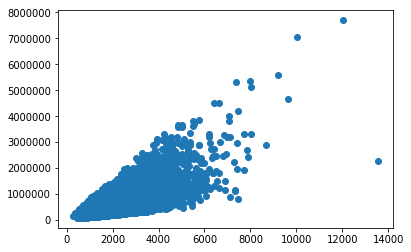

In [47]:
plt.scatter(X,Y)

In [48]:
#Finding the coefficients, Y= intercept+slope*X
denominator=X.dot(X)-X.mean()*X.sum()
slope=(X.dot(Y)-Y.mean()*X.sum())/denominator
intercept= Y.mean()-(slope*X.mean())

In [49]:
print("Slope:",slope)
print("Intercept:",intercept)

Slope: 281.95883963
Intercept: -47116.0790729


In [50]:
yhat=intercept+(slope*X)

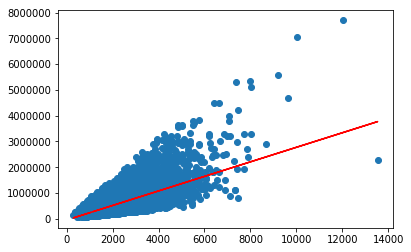

In [51]:
plt.scatter(X,Y)
plt.plot(X,yhat,color="red")

In [52]:
#Calculate R squared
RSS=(Y-yhat).dot(Y-yhat)#Residual Sum of squares
TSS =(Y-Y.mean()).dot(Y-Y.mean())#Total sum of squares
Rsquared=1-(RSS/TSS)
print(Rsquared)

0.494091401365


# Trying to see if the point i.e X>125000 is affecting th trend, let us remove that point and fit the model

In [53]:
[X>12500]


[array([False, False, False, ..., False, False, False], dtype=bool)]

In [54]:
np.where(X>12500)

(array([10285]),)

In [55]:
X[12777]

2150.0

In [56]:
X=np.delete(X,12777)
Y=np.delete(Y,12777)

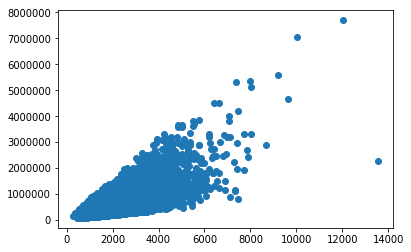

In [57]:
plt.scatter(X,Y)

In [58]:
#Finding the coefficients, Y= intercept+slope*X
denominator=X.dot(X)-X.mean()*X.sum()
slope=(X.dot(Y)-Y.mean()*X.sum())/denominator
intercept= Y.mean()-(slope*X.mean())

In [59]:
print("Slope:",slope)
print("Intercept:",intercept)

Slope: 281.96006516
Intercept: -47103.7518076


In [60]:
yhat=intercept+(slope*X)

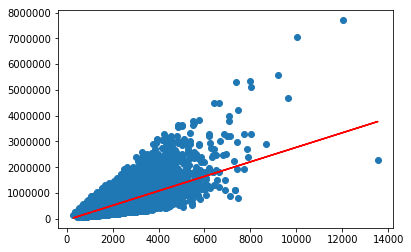

In [61]:
plt.scatter(X,Y)
plt.plot(X,yhat,color="red")

In [62]:
#Calculate R squared
RSS=(Y-yhat).dot(Y-yhat)#Residual Sum of squares
TSS =(Y-Y.mean()).dot(Y-Y.mean())#Total sum of squares
Rsquared=1-(RSS/TSS)
print(Rsquared)

0.494107400119


The point is definitely not affecting the trend, as we can see that both with and without point the slopes and intercept are almost same

# Loading the test data and predicting the prices

In [40]:
test_data=pd.read_csv('kc_house_test_data.csv',header=None)

In [41]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0114101516,20140528T000000,310000,3,1,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
2,9297300055,20150124T000000,650000,4,3,2950,5000,2,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,1202000200,20141103T000000,233000,3,2,1710,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
4,8562750320,20141110T000000,580500,3,2.5,2320,3980,2,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.07,2580,3980


In [63]:
X_test=np.array(data_file[5])
Y_actual=np.array(data_file[2])

In [65]:
X_test=np.delete(X_test,0)
X_test = X_test.astype(np.float)
Y_actual=np.delete(Y_actual,0)
Y_actual = Y_actual.astype(np.float)

In [66]:
Y_predicted=intercept+slope*X_test

In [67]:
Y_predicted

array([ 285609.12508106,  677533.61565332,  170005.49836551, ...,
        384295.14788703,  404032.35244822,  240495.51465548])

In [68]:
RSS=(Y_actual-Y_predicted).dot(Y_actual-Y_predicted)#Residual Sum of squares
TSS =(Y_actual-Y_actual.mean()).dot(Y_actual-Y_actual.mean())#Total sum of squares
Rsquared=1-(RSS/TSS)
print(Rsquared)

0.494091399736


The Rquared is 0.49 which is very less saying that only 49% of the variation is explained. In this case we have used just one variable from the given data to implement simple linear regression and ignored many feature that might have been important for predicting the sales price, hence we can that we have got smaller Rsquared values